In [ ]:
# Importing necessary libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

### Steps used in the ML Assignment below:

1. Read, understand, visualize data
2. Prepare data for modelling
    - Train-Test Split
    - Rescaling
3. Train the model
4. Residual Analysis
5. Prediction & evaluation on the test data set

In [43]:
# Reading the data

df_bike = pd.read_csv('day.csv')
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Number of rows & columns - 

df_bike.shape

(730, 16)

In [11]:
# Data types of columns and other information

df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
# Understanding the numerical data

df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [44]:
# Dropping columns that are not relevant to the analysis:
# instant - This column is the unique index of the data set, which will not be beneficial to the analysis
# dteday - The date is already captured in month, season, year, day etc.
# casual - Casual users are already counted within the cnt cariable
# registered - Registered users are already counted within the cnt variable

df_bike.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)

In [45]:
# Renaming the columns to more legible and meaningful names

df_bike = df_bike.rename(columns = {'season':'Season',
                                    'yr':'Year', 'mnth': 'Month',
                                   'holiday': 'Holiday',
                                   'weekday':'Day of Week',
                                   'workingday': 'Working Day',
                                   'weathersit': 'Weather',
                                   'temp': 'Temp',
                                   'atemp':'Temp Feel',
                                   'hum': 'Humidity',
                                   'windspeed': 'Wind Speed',
                                   'cnt': 'Bike Count'})

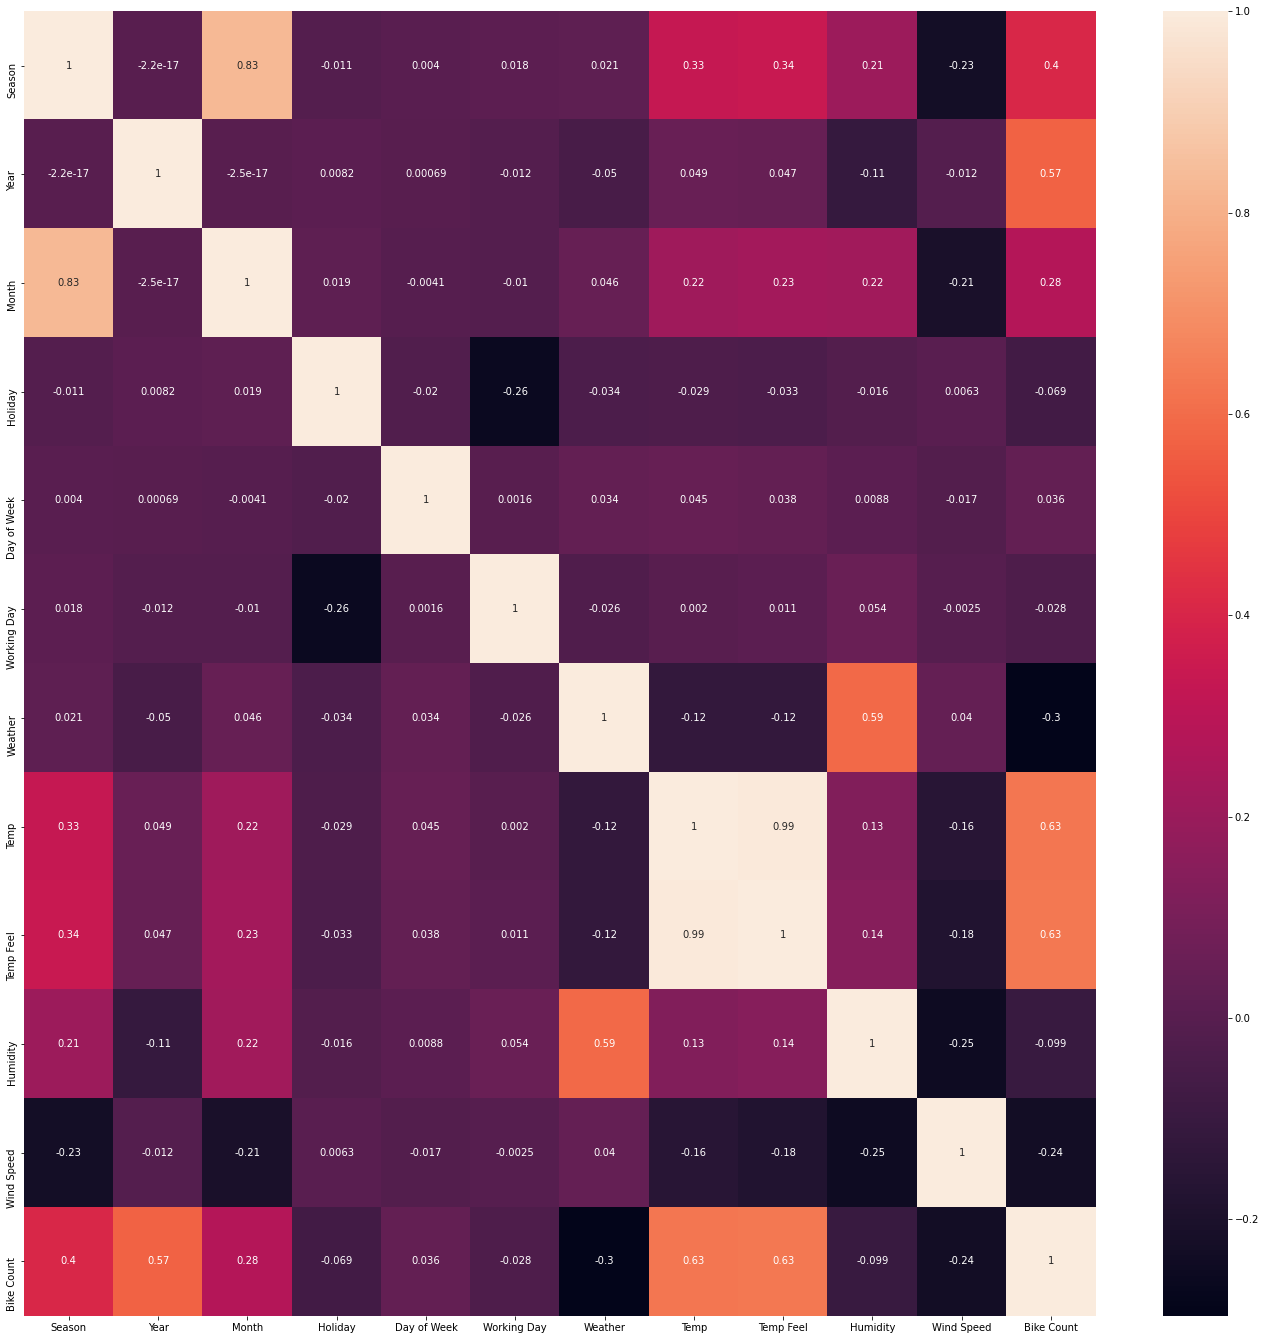

In [46]:
# Understanding the correlation between the variables using a heatmap

plt.figure(figsize = [24,24])
sns.heatmap(df_bike.corr(), annot = True)
plt.show()

### Temp & Temp Feel have a correlation of 0.99. This is because they represent almost the same data

In [47]:
# Let us understand which column to drop between the highly multicollinear ones - Temp & Temp Feel

combined = df_bike[['Temp','Temp Feel','Humidity','Wind Speed']]
combined

,Temp,Temp Feel,Humidity,Wind Speed
0,14.110847,18.18125,80.5833,10.749882
1,14.902598,17.68695,69.6087,16.652113
2,8.050924,9.47025,43.7273,16.636703
3,8.200000,10.60610,59.0435,10.739832
4,9.305237,11.46350,43.6957,12.522300
...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911
726,10.386653,12.75230,59.0000,10.416557
727,10.386653,12.12000,75.2917,8.333661
728,10.489153,11.58500,48.3333,23.500518


In [38]:
X = sm.add_constant(combined)

lr = sm.OLS(df_bike['Bike Count'],X)

lr_model = lr.fit()

# Let us take the summary to compare the p-values
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Bike Count   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     156.2
Date:                Sun, 09 May 2021   Prob (F-statistic):           2.26e-96
Time:                        11:55:02   Log-Likelihood:                -6333.3
No. Observations:                 730   AIC:                         1.268e+04
Df Residuals:                     725   BIC:                         1.270e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3855.5045    355.506     10.845      0.000    3157.561    4553.448
Temp          50.9104     55.679      0.914      0.361     -58.401     160.221
Temp Feel    103.1366     51.552      2.001      0.046       1.928     204.345
Humidity     -31.3331      3.845     -8.149      0.000     -38.882     -23.784
Wind Speed   -67.5656     10.765     -6.277      0.000     -88.699     -46.432
==============================================================================
Omnibus:                        7.840   Durbin-Watson:                   0.407
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                6.112
Skew:                           0.123   Prob(JB):                       0.0471
Kurtosis:                       2.626   Cond. No.                         491.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### - Temp has a higher p-value than Temp Feel and therefore dropping Temp column to fix the multi-collinearity

In [48]:
df_bike.drop('Temp',axis = 1, inplace = True)

In [49]:
df_bike.head()

,Season,Year,Month,Holiday,Day of Week,Working Day,Weather,Temp Feel,Humidity,Wind Speed,Bike Count
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


### Ensuring Categorical values represent correct information

In [50]:
# Season is a categorical variable. Converting the values to Categories

df_bike.Season = df_bike.Season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [51]:
# Month is a categorical variable. Converting the values to Categories

df_bike.Month = df_bike.Month.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'June',
                                   7:'July', 8:'Aug',9:'Sept',10:'Oct',11:'Nov', 12:'Dec'})

In [52]:
# Day of Week is a categorical variable. Converting the values to Categories
# Considering 0 as Monday as nothing is specified in the data disctionary

df_bike['Day of Week'] = df_bike['Day of Week'].map({0: 'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri',5:'Sat',6:'Sun'})

In [53]:
# Weather is a categorical variable. Converting the values to Categories

df_bike.Weather = df_bike.Weather.map({1:'Clear', 2:'Misty', 3:'Light Rain/Snow', 4:'Heavy Rain/Snow'})

In [54]:
df_bike.head()

,Season,Year,Month,Holiday,Day of Week,Working Day,Weather,Temp Feel,Humidity,Wind Speed,Bike Count
0,Spring,0,Jan,0,Tue,1,Misty,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Wed,1,Misty,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Thu,1,Clear,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Fri,1,Clear,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Sat,1,Clear,11.46350,43.6957,12.522300,1600


<Figure size 1728x1728 with 0 Axes>

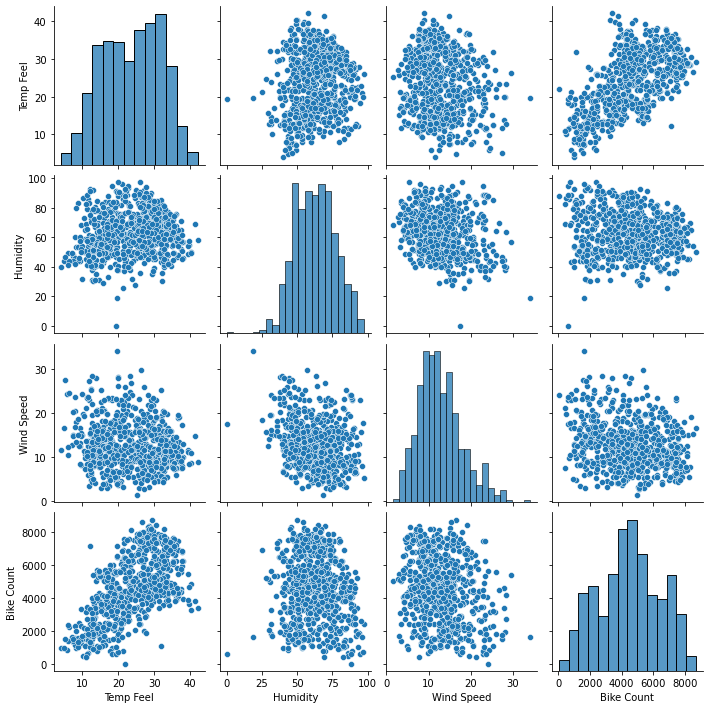

In [55]:
# Plotting pairplots to visualize the numerical data

plt.figure(figsize = [24,24])
sns.pairplot(df_bike[['Temp Feel','Humidity','Wind Speed','Bike Count']])
plt.show()

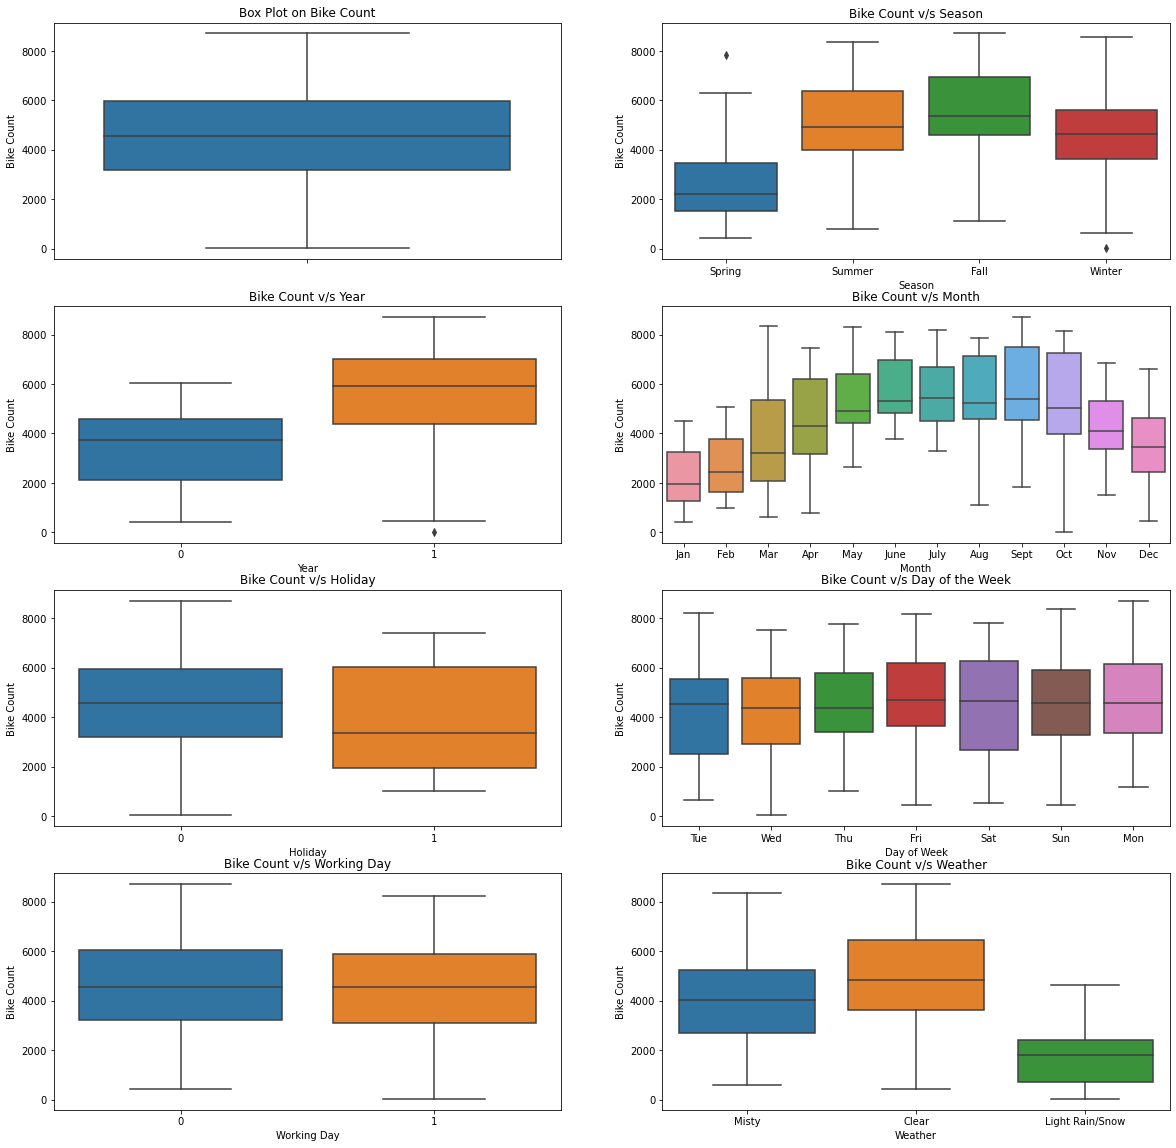

In [56]:
# Plotting boxplots to visualize the categorical data

fig, ax = plt.subplots(4,2)
fig.set_size_inches(20,20)

sns.boxplot(data = df_bike, y = 'Bike Count', ax = ax[0][0])
sns.boxplot(data = df_bike, x = 'Season', y = 'Bike Count', ax = ax[0][1])
sns.boxplot(data = df_bike, x = 'Year', y = 'Bike Count', ax = ax[1][0])
sns.boxplot(data = df_bike, x = 'Month', y = 'Bike Count', ax = ax[1][1])
sns.boxplot(data = df_bike, x = 'Holiday', y = 'Bike Count', ax = ax[2][0])
sns.boxplot(data = df_bike, x = 'Day of Week', y = 'Bike Count', ax = ax[2][1])
sns.boxplot(data = df_bike, x = 'Working Day', y = 'Bike Count', ax = ax[3][0])
sns.boxplot(data = df_bike, x = 'Weather', y = 'Bike Count', ax = ax[3][1])

ax[0][0].set(ylabel = 'Bike Count', title = 'Box Plot on Bike Count')
ax[0][1].set(xlabel = 'Season',ylabel = 'Bike Count', title = 'Bike Count v/s Season')
ax[1][0].set(xlabel = 'Year',ylabel = 'Bike Count', title = 'Bike Count v/s Year')
ax[1][1].set(xlabel = 'Month',ylabel = 'Bike Count', title = 'Bike Count v/s Month')
ax[2][0].set(xlabel = 'Holiday',ylabel = 'Bike Count', title = 'Bike Count v/s Holiday')
ax[2][1].set(xlabel = 'Day of Week',ylabel = 'Bike Count', title = 'Bike Count v/s Day of the Week')
ax[3][0].set(xlabel = 'Working Day',ylabel = 'Bike Count', title = 'Bike Count v/s Working Day')
ax[3][1].set(xlabel = 'Weather',ylabel = 'Bike Count', title = 'Bike Count v/s Weather')

plt.show()

### Significance of Categorical variables wrt Target Variable - 

> - Bike Count:
    1. Evenly spread
    2. Mean and median seem to be approximately same
    3. The lower half of the boxplot mirrors the upper half
    
> - Bike Count v/s Season
    1. Bike Count is highest in the Fall followed by Summer
    2. Bike Count is lowest in the Spring with one outlier
    3. The min count is more or less similar throughtout the seasons

> - Bike Count v/s Year
    1. Significant increase in the Bike Count in 2019 as compared to 2018
    2. The maximum count for 2018 is almost equal to the mean count of 2019

> - Bike Count v/s Month
    1. Bike Count is high from May through September
    2. Bike Count decreases in October and the decrease is consistent untill February

> - Bike Count v/s Holiday
    1. Holiday does not have a significant impact on Bike Count
    2. In fact Bike Count is more when it's not a holiday, indicating that people might be commuting to work using Bikes

> - Bike Count v/s Week
    1. Day of the week does not have much of an impact on Bike Count
    2. However, an increase is observed on Monday, followed by Friday

> - Bike Count v/s Working Day
    1. Working Day does not have much of an impact on Bike Count
    2. A slight increased is observed when it's not a Working Day which is counter intuitive, considering the Bike Count plotted for Holidays

> - Bike Count v/s Weather
    1. Bike Count is highest in clear weather followed by Misty weather
    2. Bike Count is lowest during a Light Rain/Storm or a drizzle

### Converting categorical columns into indicator variables
- We need k-1 dummy variables for k number of categorical variables, hence dropping the first column in each dataframe

In [57]:
status1 = pd.get_dummies(df_bike.Season, drop_first = True)
status1.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [58]:
status2 = pd.get_dummies(df_bike.Month, drop_first = True)
status2.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [59]:
status3 = pd.get_dummies(df_bike['Day of Week'], drop_first = True)
status3.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,0,1,0
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,0,0,0,0,0,0
4,0,1,0,0,0,0


In [60]:
status4 = pd.get_dummies(df_bike.Weather, drop_first = True)
status4.head()

,Light Rain/Snow,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


### The dummy variables will be concatenated to the original dataframe.
- Therefore, dropping the categorical columns

In [61]:
df_bike.drop(['Season','Month','Day of Week','Weather'], axis = 1, inplace = True)

In [62]:
df_bike = pd.concat([df_bike,status1,status2,status3,status4], axis = 1)
df_bike.head()

,Year,Holiday,Working Day,Temp Feel,Humidity,Wind Speed,Bike Count,Spring,Summer,Winter,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain/Snow,Misty
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,1,0,0,0,0,0,0


### Before model building, we need to perform the test-train split and scale the features.
- Splitting the data into train and test

In [142]:
df_train, df_test = train_test_split(df_bike, train_size = 0.7, random_state = 100)

### Rescaling
- Using MinMax Scaling method to rescale the numerical variables

In [143]:
numerical_cols = ['Temp Feel','Humidity','Wind Speed','Bike Count']

In [144]:
scaler = MinMaxScaler()
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_train.head()

,Year,Holiday,Working Day,Temp Feel,Humidity,Wind Speed,Bike Count,Spring,Summer,Winter,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain/Snow,Misty
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,0,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [145]:
# Ensuring the MinMaxScaler has worked as expected
# confirming minimum vales 0 and maximum values 1 for all variables

df_train[numerical_cols].describe()

,Temp Feel,Humidity,Wind Speed,Bike Count
count,510.000000,510.000000,510.000000,510.000000
mean,0.513156,0.650480,0.320883,0.513499
std,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.332086,0.538643,0.199179,0.356420
50%,0.529718,0.653714,0.296763,0.518638
75%,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


### Training the Model

In [105]:
df_train.head()

,Year,Holiday,Working Day,Temp Feel,Humidity,Wind Speed,Bike Count,Spring,Summer,Winter,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain/Snow,Misty
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,0,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [146]:
y_train = df_train.pop('Bike Count')
X_train = df_train

In [147]:
# Let us use the statsmodel.api library to add a constant column to the X_train dataframe

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Bike Count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     95.81
Date:                Sun, 09 May 2021   Prob (F-statistic):          4.50e-177
Time:                        13:59:35   Log-Likelihood:                 519.23
No. Observations:                 510   AIC:                            -980.5
Df Residuals:                     481   BIC:                            -857.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4187      0.085      4.903      0.000       0.251       0.586
Year                0.2330      0.008     28.480      0.000       0.217       0.249
Holiday            -0.1337      0.066     -2.028      0.043      -0.263      -0.004
Working Day        -0.0657      0.072     -0.918      0.359      -0.207       0.075
Temp Feel           0.4104      0.046      8.958      0.000       0.320       0.500
Humidity           -0.1519      0.039     -3.878      0.000      -0.229      -0.075
Wind Speed         -0.1649      0.026     -6.279      0.000      -0.216      -0.113
Spring             -0.0474      0.030     -1.560      0.120      -0.107       0.012
Summer              0.0382      0.026      1.443      0.150      -0.014       0.090
Winter              0.1067      0.028      3.761      0.000       0.051       0.162
Aug                 0.0487      0.034      1.448      0.148      -0.017       0.115
Dec                -0.0530      0.034     -1.558      0.120      -0.120       0.014
Feb                -0.0454      0.033     -1.359      0.175      -0.111       0.020
Jan                -0.0748      0.034     -2.206      0.028      -0.141      -0.008
July               -0.0092      0.035     -0.263      0.793      -0.078       0.060
June                0.0281      0.024      1.146      0.252      -0.020       0.076
Mar                -0.0011      0.025     -0.045      0.964      -0.050       0.048
May                 0.0364      0.021      1.724      0.085      -0.005       0.078
Nov                -0.0457      0.037     -1.237      0.217      -0.118       0.027
Oct                 0.0055      0.037      0.152      0.879      -0.066       0.077
Sept                0.1004      0.032      3.106      0.002       0.037       0.164
Mon                -0.0594      0.072     -0.822      0.412      -0.201       0.083
Sat                -0.0042      0.015     -0.276      0.783      -0.034       0.025
Sun                -0.0622      0.072     -0.859      0.391      -0.204       0.080
Thu                -0.0152      0.016     -0.980      0.328      -0.046       0.015
Tue                -0.0300      0.015     -2.017      0.044      -0.059      -0.001
Wed                -0.0310      0.015     -2.089      0.037      -0.060      -0.002
Light Rain/Snow    -0.2478      0.027     -9.211      0.000      -0.301      -0.195
Misty              -0.0594      0.011     -5.608      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       79.764   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.202
Skew:                          -0.749   Prob(JB):                     1.70e-50
Kurtosis:                       5.922   Cond. No.                         70.2


### 84.8% of variance in the data is explained by this model

In [148]:
# Now let's compute the VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,Working Day,62.59
4,Humidity,41.07
3,Temp Feel,37.85
6,Spring,13.49
8,Winter,12.37
20,Mon,12.24
22,Sun,11.65
7,Summer,9.79
17,Nov,7.15
18,Oct,6.81


### Performing RFE for variable selection

In [149]:
# Running RFE with 12 output variables

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,12)
rfe = rfe.fit(X_train,y_train)

In [150]:
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['Year', 'Holiday', 'Temp Feel', 'Humidity', 'Wind Speed', 'Summer',
       'Winter', 'Aug', 'Jan', 'Sept', 'Light Rain/Snow', 'Misty'],
      dtype='object')

### Building a Model using statsmodel for understanding the detailed summary

In [151]:
X_train_rfe = X_train[rfe_cols]

In [152]:
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe)

lm_model = lm.fit()

lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Bike Count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.9
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.83e-187
Time:                        13:59:55   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -979.3
Df Residuals:                     497   BIC:                            -924.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2502      0.029      8.746      0.000       0.194       0.306
Year                0.2303      0.008     28.012      0.000       0.214       0.246
Holiday            -0.0912      0.026     -3.520      0.000      -0.142      -0.040
Temp Feel           0.5348      0.026     20.289      0.000       0.483       0.587
Humidity           -0.1750      0.038     -4.598      0.000      -0.250      -0.100
Wind Speed         -0.1724      0.026     -6.579      0.000      -0.224      -0.121
Summer              0.0949      0.011      8.298      0.000       0.072       0.117
Winter              0.1306      0.012     11.134      0.000       0.108       0.154
Aug                 0.0667      0.016      4.084      0.000       0.035       0.099
Jan                -0.0402      0.018     -2.263      0.024      -0.075      -0.005
Sept                0.1241      0.016      7.566      0.000       0.092       0.156
Light Rain/Snow    -0.2301      0.027     -8.620      0.000      -0.283      -0.178
Misty              -0.0533      0.011     -5.020      0.000      -0.074      -0.032
==============================================================================
Omnibus:                       53.207   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.194
Skew:                          -0.538   Prob(JB):                     1.97e-29
Kurtosis:                       5.250   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### - Let's calculate the VIFs of all 12 variables

In [153]:
vif = pd.DataFrame()

vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values,i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,Humidity,18.52
2,Temp Feel,11.47
4,Wind Speed,3.60
11,Misty,2.16
0,Year,2.04
6,Winter,2.02
5,Summer,1.96
7,Aug,1.56
8,Jan,1.54
9,Sept,1.32


#### From the data above, we can see that Humidity has a VIF well above the threshold of 4. Let us drop that variable

In [154]:
X_train_rfe.drop('Humidity', axis = 1, inplace = True)

lr = sm.OLS(y_train, X_train_rfe)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Bike Count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.4
Date:                Sun, 09 May 2021   Prob (F-statistic):          3.60e-184
Time:                        14:00:04   Log-Likelihood:                 492.05
No. Observations:                 510   AIC:                            -960.1
Df Residuals:                     498   BIC:                            -909.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1546      0.020      7.713      0.000       0.115       0.194
Year                0.2344      0.008     28.112      0.000       0.218       0.251
Holiday            -0.0926      0.026     -3.503      0.001      -0.145      -0.041
Temp Feel           0.5067      0.026     19.374      0.000       0.455       0.558
Wind Speed         -0.1410      0.026     -5.465      0.000      -0.192      -0.090
Summer              0.0913      0.012      7.840      0.000       0.068       0.114
Winter              0.1193      0.012     10.197      0.000       0.096       0.142
Aug                 0.0649      0.017      3.893      0.000       0.032       0.098
Jan                -0.0465      0.018     -2.577      0.010      -0.082      -0.011
Sept                0.1177      0.017      7.061      0.000       0.085       0.151
Light Rain/Snow    -0.2781      0.025    -11.092      0.000      -0.327      -0.229
Misty              -0.0811      0.009     -9.095      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       51.965   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.082
Skew:                          -0.544   Prob(JB):                     3.09e-27
Kurtosis:                       5.136   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
X_train_rfe.columns

Index(['const', 'Year', 'Holiday', 'Temp Feel', 'Wind Speed', 'Summer',
       'Winter', 'Aug', 'Jan', 'Sept', 'Light Rain/Snow', 'Misty'],
      dtype='object')

In [156]:
vif = pd.DataFrame()

vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif.drop([0], axis = 0, inplace = True)

vif

,Features,VIF
3,Temp Feel,1.80
8,Jan,1.54
6,Winter,1.49
5,Summer,1.48
7,Aug,1.41
9,Sept,1.20
4,Wind Speed,1.12
10,Light Rain/Snow,1.05
11,Misty,1.05
1,Year,1.02


#### Based on data understanding, removing variable Jan instead of Temp Feel, as Temp Feel might be a more relavant variable wrt Bike Count

In [157]:
X_train_rfe.drop('Jan', axis = 1, inplace = True)

lr = sm.OLS(y_train, X_train_rfe)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Bike Count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Sun, 09 May 2021   Prob (F-statistic):          6.05e-184
Time:                        14:00:14   Log-Likelihood:                 488.67
No. Observations:                 510   AIC:                            -955.3
Df Residuals:                     499   BIC:                            -908.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1275      0.017      7.429      0.000       0.094       0.161
Year                0.2334      0.008     27.867      0.000       0.217       0.250
Holiday            -0.0934      0.027     -3.513      0.000      -0.146      -0.041
Temp Feel           0.5370      0.024     22.850      0.000       0.491       0.583
Wind Speed         -0.1319      0.026     -5.132      0.000      -0.182      -0.081
Summer              0.0990      0.011      8.750      0.000       0.077       0.121
Winter              0.1311      0.011     12.114      0.000       0.110       0.152
Aug                 0.0679      0.017      4.065      0.000       0.035       0.101
Sept                0.1209      0.017      7.226      0.000       0.088       0.154
Light Rain/Snow    -0.2760      0.025    -10.953      0.000      -0.326      -0.227
Misty              -0.0822      0.009     -9.184      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       51.460   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.152
Skew:                          -0.530   Prob(JB):                     1.10e-27
Kurtosis:                       5.172   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observations

> - R^2 for the train data set in the final model - 82.9%
> - Adjusted R^2 for the train data set in the final model - 82.5%

In [158]:
vif = pd.DataFrame()

vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif.drop([0], axis = 0, inplace = True)

vif

,Features,VIF
3,Temp Feel,1.44
7,Aug,1.41
5,Summer,1.38
6,Winter,1.26
8,Sept,1.20
4,Wind Speed,1.10
9,Light Rain/Snow,1.05
10,Misty,1.05
1,Year,1.02
2,Holiday,1.02


### Residual Analysis and Predictions

In [159]:
y_train_pred = lr_model.predict(X_train_rfe)

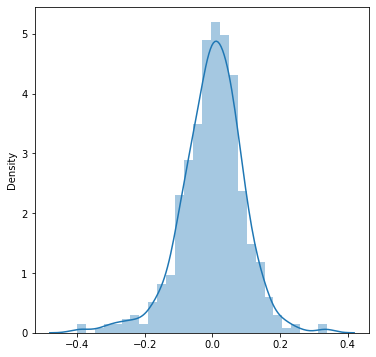

In [160]:
# Checking if the errors are normally distributed and centered around 0

res = y_train - y_train_pred

plt.figure(figsize = [6,6])
sns.distplot(res)
plt.show()

>#### - This validates the First Assumption of Linear Regression - Normal Distribution of Errors
> - The residual errors are normally distrubuted around the mean - 0

In [161]:
# Let us now scale the test data set just like we did the train data set

df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])
df_test.head()

,Year,Holiday,Working Day,Temp Feel,Humidity,Wind Speed,Bike Count,Spring,Summer,Winter,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain/Snow,Misty
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,1,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,0,0.496145,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,1,0,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,1,0,0,0,0,0,0
152,0,0,0,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [162]:
# Checking if the scaling has worked

df_test[numerical_cols].describe()

,Temp Feel,Humidity,Wind Speed,Bike Count
count,220.000000,220.000000,220.000000,220.000000
mean,0.532847,0.638221,0.313293,0.522154
std,0.217401,0.148694,0.159584,0.219163
min,0.025950,0.261915,-0.042808,0.048205
25%,0.344870,0.529197,0.198843,0.378595
50%,0.544652,0.625590,0.300126,0.524678
75%,0.713308,0.743798,0.402718,0.677750
max,0.980934,1.002146,0.807474,0.963300


In [163]:
# Declaring y_test and X_test

y_test = df_test.pop('Bike Count')
X_test = df_test

In [164]:
# Adding a constant to the X_test

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Year,Holiday,Working Day,Temp Feel,Humidity,Wind Speed,Spring,Summer,Winter,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain/Snow,Misty
184,1.0,0,1,0,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,0,1,0,0,0,1
535,1.0,1,0,1,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,1.0,0,0,0,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,0,1,0,0,0,0,1
221,1.0,0,0,1,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,1,0,0,0,0,0,0
152,1.0,0,0,0,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [165]:
# Understanding which columns to drop for the test dataset based on the variables taken in the train data set

drop_cols = X_train.columns[~rfe.support_]
drop_cols

Index(['Working Day', 'Spring', 'Dec', 'Feb', 'July', 'June', 'Mar', 'May',
       'Nov', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [166]:
X_test_sm = X_test_sm.drop(drop_cols, axis = 1)

In [172]:
X_test_sm.head()

,const,Year,Holiday,Temp Feel,Wind Speed,Summer,Winter,Aug,Sept,Light Rain/Snow,Misty
184,1.0,0,1,0.769660,0.084219,0,0,0,0,0,1
535,1.0,1,0,0.842587,0.153728,1,0,0,0,0,0
299,1.0,0,0,0.496145,0.334206,0,1,0,0,0,1
221,1.0,0,0,0.795343,0.339570,0,0,1,0,0,0
152,1.0,0,0,0.741471,0.537414,1,0,0,0,0,0


In [173]:
# Also dropping variables Humidity & Jan manually

X_test_sm.drop(['Humidity','Jan'], axis = 1, inplace = True)

lr = sm.OLS(y_test, X_test_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Bike Count   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     87.29
Date:                Sun, 09 May 2021   Prob (F-statistic):           5.62e-69
Time:                        14:02:25   Log-Likelihood:                 203.14
No. Observations:                 220   AIC:                            -384.3
Df Residuals:                     209   BIC:                            -346.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0589      0.028      2.091      0.038       0.003       0.115
Year                0.2393      0.014     17.533      0.000       0.212       0.266
Holiday            -0.0664      0.036     -1.854      0.065      -0.137       0.004
Temp Feel           0.5979      0.035     16.931      0.000       0.528       0.667
Wind Speed         -0.0204      0.045     -0.455      0.649      -0.109       0.068
Summer              0.0856      0.017      4.915      0.000       0.051       0.120
Winter              0.1534      0.018      8.713      0.000       0.119       0.188
Aug                 0.0290      0.032      0.918      0.360      -0.033       0.091
Sept                0.0780      0.025      3.086      0.002       0.028       0.128
Light Rain/Snow    -0.2350      0.043     -5.511      0.000      -0.319      -0.151
Misty              -0.0714      0.015     -4.883      0.000      -0.100      -0.043
==============================================================================
Omnibus:                       13.569   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.256
Skew:                          -0.515   Prob(JB):                     0.000487
Kurtosis:                       3.776   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
X_test_sm.columns

Index(['const', 'Year', 'Holiday', 'Temp Feel', 'Wind Speed', 'Summer',
       'Winter', 'Aug', 'Sept', 'Light Rain/Snow', 'Misty'],
      dtype='object')

In [176]:
vif = pd.DataFrame()

vif['Features'] = X_test_sm.columns
vif['VIF'] = [variance_inflation_factor(X_test_sm.values,i) for i in range(X_test_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif.drop([0], axis = 0, inplace = True)

vif

,Features,VIF
3,Temp Feel,1.33
5,Summer,1.33
6,Winter,1.27
7,Aug,1.26
4,Wind Speed,1.15
8,Sept,1.14
9,Light Rain/Snow,1.09
1,Year,1.05
10,Misty,1.05
2,Holiday,1.02


>#### - This validates the Second Assumption of Linear Regression - Multicollinearity
> - The model has no multicollinearity which is evident from the VIF values as all are less than 2 (less than 4 was considered acceptable in this analysis)

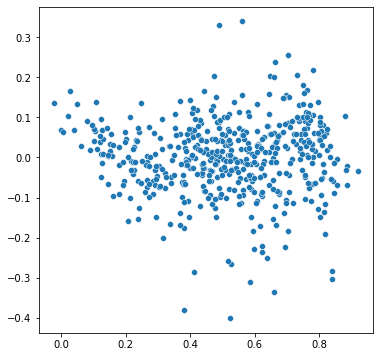

In [199]:
# Plotting y_train_pred and the residuals to understand variance spread

plt.figure(figsize = [6,6])
sns.scatterplot(y_train_pred,res)
plt.show()

>#### - This validates the Third Assumption of Linear Regression - Homeoscedasticity
> - The variance has no visible pattern which indicates that it is constant as the error terms change

In [177]:
# Predicting the y_test_pred using the trained model

y_test_pred = lr_model.predict(X_test_sm)

In [182]:
# Let us calculate the R-squared on the test dataset

r2_score(y_true = y_test,y_pred = y_test_pred)

0.8068261321747227

### Observations

> - R^2 for the test data set - 80.7%
> - Adjusted R^2 for the test data set - 79.8%
> - Difference between Adjusted R^2 of the training & test data sets - 2.7%

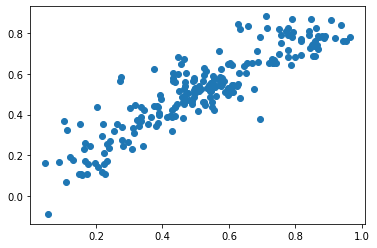

In [191]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)     

## Conclusions:

- Consider the coefficients of the variables from the final model - 

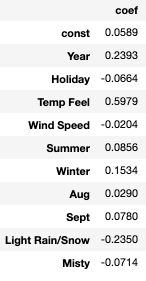

- The most significant positive contributor is the `Temp Feel` (feeling temperature in Celcius) followed by `Year` and `Winter`

> `Bike Count`  =  0.0589 + `Temp Feel` X 0.5979 + `Year` X 0.2393 + `Winter` X 0.1534 + `Summer` X 0.0856 + `Sept` X 0.078 + `Aug` X 0.029 - `Wind Speed` X 0.0204 - `Holiday` X 0.0664 - `Misty` X 0.0714 - `Light Rain/Snow` X 0.235

- The most significant negative contributor is the `Light Rain/Snow` followed by `Misty weather` and whether or not it's a `Holiday`. High `Wind Speed` also brings the Bike Count down

In [201]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "manalibhagwat/bike-sharing-assignment-dsc27-manali-bhagwat" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/manalibhagwat/bike-sharing-assignment-dsc27-manali-bhagwat


'https://jovian.ai/manalibhagwat/bike-sharing-assignment-dsc27-manali-bhagwat'